# Introduction

This notebook demonstrates how to plot time series from the UKESM1 simulations

#### Firstly, import packages and define functions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plotting time series computed by the CVDP package

The Climate Variability Diagnostics Package computes a whole bunch of time series. Some of then, such as the Nino3.4 index, need to be treated with caution. But some are really useful.

*Run only one of the following two cells depending whether your Notebook server is at UCL or on your own laptop*  

In [ ]:
#FOR THE GEOGRAPHY CLUSTER
'''Select file and variable names'''
#first of all specify some names
reference_period='1851-1900'
ssp_names=["ssp126", "ssp245", "ssp370","ssp585"]
directory='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %reference_period

# determine the filenames for the 3 scenarios
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[0],reference_period)
filename245='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[1],reference_period)
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[3],reference_period)


In [ ]:
#FOR YOUR OWN LAPTOP
'''Select file and variable names'''
#first of all specify some names
reference_period='1851-1900'
ssp_names=["ssp126", "ssp245", "ssp370","ssp585"]
directory='Data'

# determine the filenames for the 3 scenarios
filename126='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[0],reference_period)
filename245='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[1],reference_period)
filename585='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp_names[3],reference_period)

#Download the files if they are not already here
import os
import urllib
if not os.path.isfile(filename126):
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_ssp126_1851-1900.cvdp_data.1850-2100.nc", filename126)
    
if not os.path.isfile(filename245):
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_ssp245_1851-1900.cvdp_data.1850-2100.nc", filename245)
    
if not os.path.isfile(filename585):
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/downloads/UKESM1_ssp585_1851-1900.cvdp_data.1850-2100.nc", filename585)    

#### Plot the global mean temperature changes in the two extreme scenarios
This is equivalent to the Fig SPM.7a in the IPCC's 5th assessment report

In [ ]:
#Start with SSP126
# open the file to get the data
ssp126=xr.open_dataset(filename126)
# create a plot of the variable called ipcc_GLOBAL_all_tas
ssp126.ipcc_GLOBAL_all_tas.plot() #by default the first line is blue

#Then move onto SSP585
# open the file to get the data
ssp585=xr.open_dataset(filename585)
# create a plot of the variable called ipcc_GLOBAL_all_tas
ssp585.ipcc_GLOBAL_all_tas.plot() #by default the second line is orange

#### Plot the nino34 index in the ssp245 scenario
The Niño3.4 index is measured as area-averaged temperature anomalies over a region of the tropical Pacific. As the globe warms, this region also warms (as shown in the plot below).

But this does not mean that we will be locked into a permanent El Niño state (you can still observe the strong interannual variability in the time series). The Bjerknes feedbacks depend on the temperature gradients, instead of the absolute value in the Niño3.4 region. So you need to exercise some judgement when discussing the plot below

In [ ]:
# open the ssp245 CVDP file to get the data
ssp245=xr.open_dataset(filename245)

# create a plot of the variable called nino34.
ssp245.nino34.plot(color='green')  #We've overridden the default color

To modify a plot to be more visually appealing, and to save it we need to do a little bit more...

In [ ]:
# Remake the plot as an explicit object called fig
fig=ssp245.nino34.plot(color='green') 

# relabel the y axis
plt.ylabel('nino3.4 anomalies in SSP245 (wrt 1850-1900, oC)')
# relabel the x axis
plt.xlabel('Year')

#Constraining the horizontal axis is more awkward
import cftime as cftime
start_date=cftime.Datetime360Day(1850,1,1,0,0,0)
end_date=cftime.Datetime360Day(2100,12,30,0,0,0)
# alter the limits of the axes
plt.axis([start_date,end_date, -4, 6]) #[xmin, xmax, ymin, ymax]; Note that the years are strings 
# add a grid in the background
plt.grid(True)

#Finally save the figure to your current directory...
plt.savefig("nino34_timeseries_plot.pdf")

# Computing and plotting a time series directly from the UKESM1 output
This approach is much more flexible, as you can plot whatever you want. However, it also takes a fair bit longer to do, as you are interacting with monthly 2D or 3D fields. Here we will demonstrate the necessary steps, by recreating one of the global mean time series above.


*Run only one of the following two cells depending whether your Notebook server is at UCL or on your own laptop*  

In [ ]:
# FOR THE GEOGRAPHY CLUSTER: THIS IS MORE FLEXIBLE

#Identify a long globbing string that will pick up all the historical and ssp585 surface temperature files in a single go.
cmip_variable_name='tas'
ssp='ssp585'
directory='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/*/%s/gn/v*' %(cmip_variable_name)
hist_string='%s/%s_*_UKESM1-0-LL_*_r1i1p1f2_gn_*.nc '%(directory,cmip_variable_name)
directory='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/%s/r1i1p1f2/*/%s/gn/v*' %(ssp,cmip_variable_name)
ssp_string='%s/%s_*_UKESM1-0-LL_*_r1i1p1f2_gn_*.nc'%(directory,cmip_variable_name)
# Now use the shell (bash in the linux system) to detect the file names
files = !ls {hist_string} {ssp_string}
files

In [2]:
# FOR THE OWN LAPTOP: THIS REQUIRES PRIOR KNOWLEDGE OF THE FILE NAMES

#Identify all the required files and associated urls if they have not already been downloaded
files=['Data/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc',
       'Data/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc',
       'Data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc',
       'Data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc']
urls=['http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/cmip6_UKESM1_data/historical/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc',
     'http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/cmip6_UKESM1_data/historical/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc',
     'http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/cmip6_UKESM1_data/ssp585/Amon/tas/gn/v20190507/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc',
     'http://www2.geog.ucl.ac.uk/~ucfaccb/geog0121/cmip6_UKESM1_data/ssp585/Amon/tas/gn/v20190507/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc']

#Download the files if they are not already here
import os
import urllib
for i in range(0, 4):
    if not os.path.isfile(files[i]):
        print('Downloading file %s' %(i))
        !mkdir Data 
        #This should flag an error, if the directory already exists. 
        urllib.request.urlretrieve(urls[i],files[i])

files

['Data/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc',
 'Data/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc',
 'Data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc',
 'Data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc']

In [11]:
#load in all that data. This may take some time, esp if you are using a 3D variable
loaded_data=xr.open_mfdataset(paths=files,combine='by_coords')
#Print the metadata - which will be taken from the first of the files only
loaded_data

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 3012)
Coordinates:
    height     float64 1.5
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * time       (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(1200, 144, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-04-05T16:02:56Z
    cv_version:             6.2.20.1
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MOHC.UKESM1-...
    grid:                   Native N96 grid; 192 x 144 longitude/latitude
    grid_label:             gn
    history:                2019-04-05T15:50:03Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institution_id:         MOHC
    mip_era:                CMIP6
    mo_runid:               u-bc179
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       UKESM1-0-LL
    parent_time_units:      days since 1850-01-01-00-00-00
    parent_variant_label:   r1i1p1f2
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 UKESM1.0-LL (2018): \naerosol: UKCA-GLOMAP-mode\n...
    source_id:              UKESM1-0-LL
    source_type:            AOGCM AER BGC CHEM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(13 December 2018) MD5:2b12b5db6db1...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/255d149c-12fc-41f1-878d-0344c8b797f4

In [4]:
#Separate out the various variables 
# (disappointing xarray does not have an area-weighted averaging ability)

tas=loaded_data.tas
lon=loaded_data.lon
lat=loaded_data.lat
lat #finish by printing out the data of the latitudes

<xarray.DataArray 'lat' (lat: 144)>
array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875, -80.625,
       -79.375, -78.125, -76.875, -75.625, -74.375, -73.125, -71.875, -70.625,
       -69.375, -68.125, -66.875, -65.625, -64.375, -63.125, -61.875, -60.625,
       -59.375, -58.125, -56.875, -55.625, -54.375, -53.125, -51.875, -50.625,
       -49.375, -48.125, -46.875, -45.625, -44.375, -43.125, -41.875, -40.625,
       -39.375, -38.125, -36.875, -35.625, -34.375, -33.125, -31.875, -30.625,
       -29.375, -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
       -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
        -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,  -0.625,
         0.625,   1.875,   3.125,   4.375,   5.625,   6.875,   8.125,   9.375,
        10.625,  11.875,  13.125,  14.375,  15.625,  16.875,  18.125,  19.375,
        20.625,  21.875,  23.125,  24.375,  25.625,  26.875,  28.125,  29.375,
        30.625,  31.875,  33.125,  34.375,  35.625,  36.875,  38.125,  39.375,
        40.625,  41.875,  43.125,  44.375,  45.625,  46.875,  48.125,  49.375,
        50.625,  51.875,  53.125,  54.375,  55.625,  56.875,  58.125,  59.375,
        60.625,  61.875,  63.125,  64.375,  65.625,  66.875,  68.125,  69.375,
        70.625,  71.875,  73.125,  74.375,  75.625,  76.875,  78.125,  79.375,
        80.625,  81.875,  83.125,  84.375,  85.625,  86.875,  88.125,  89.375])
Coordinates:
    height   float64 1.5
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

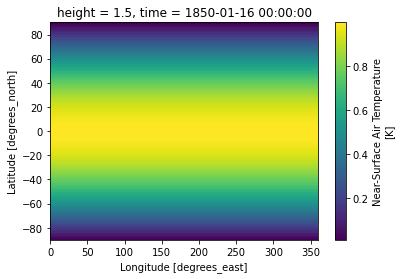

In [5]:
#create some weights for the temperatures
weight=tas[0,:,:] #using tas to copy over metadata
weight.values=np.ones((lat.shape[0],lon.shape[0]))
for i in range(lat.shape[0]):
    w=lat[i].values*np.pi/180
    wc=np.cos(w)
    weight.values[i,:]=np.repeat(wc,lon.shape[0])

weight.plot()

Now for the actual number crunching. This may take some time...

In [6]:
#create and fill an array of global mean temperatures
gmt=np.zeros(tas.shape[0])
for t in range(tas.shape[0]):
    gmt[t]=np.average(tas[t,:,:],weights=weight)

#Put that information back into a plottable array
ave=tas[:,0,0] #using this subsetting approach to maintain metadata
#now overwrite the contents of ave
ave.values=gmt


At this point we have created monthly global mean values for surface temperature. We can plot this, but the seasonal variations will make it rather messy...

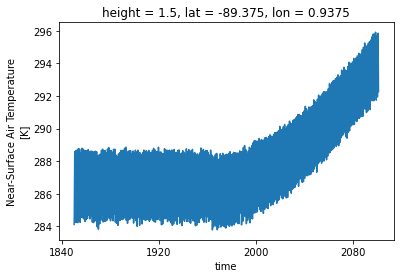

In [7]:
ave.plot()

So let us instead convert these to monthly anomalies. We'll select a climatology at from 1850-1900 for our climatology

In [9]:
preindustrial_values=ave.sel(time=slice('1850-01-01', '1900-12-30'))
climatology = preindustrial_values.groupby("time.month").mean("time")
anomalies = ave.groupby("time.month") - climatology
anomalies

<xarray.DataArray 'tas' (time: 3012)>
array([-0.2672714 , -0.23451644, -0.03338939, ...,  7.29862908,
        7.50389708,  7.49667425])
Coordinates:
    height   float64 1.5
    lat      float64 -89.38
    lon      float64 0.9375
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
    month    (time) int32 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

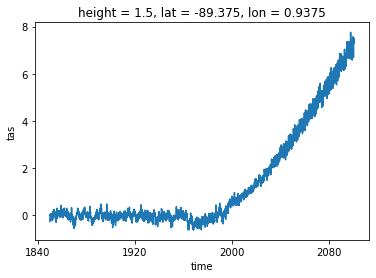

In [10]:
anomalies.plot()